# Regression Project

The main goal of the project: pick a regression model and find the best
RMSE given train data (X and y) and given the X of the test data. The y of the test data is not given. 

In [118]:
# Imports:
import pandas as pd
import seaborn as sns # Correlation matrix
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.linear_model import Lasso
from sklearn.preprocessing import OneHotEncoder, StandardScaler # for one-hot encoding in regression and data normalization

# import pydot
# from IPython.display import Image
# from six import StringIO
# from sklearn.tree import export_graphviz

In [7]:
# !pip install pandas numpy matplotlib seaborn scikit-learn
# ! pip install pydot


In [11]:
X_train = pd.read_csv("X.csv")
X_train.head(4)

,Unnamed: 0.1,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race,height,weight,id,professionalism
0,2477,2477,52.0,M,bachelor's|degr,back|end|develope,24.0,australi,Asian,1.800316,95.021957,2477,1150.0
1,76,76,52.0,F,bachelor,operations|manage,23.0,us,White,2.451414,87.456039,76,1100.0
2,64,64,27.0,M,bachelor,junior|accountan,2.0,australi,Australian,1.917509,56.997108,64,26.0
3,924,924,32.0,M,bachelor,data|analys,11.0,u,Welsh,2.160562,61.403169,924,279.0


In [12]:
X_train.shape

(5363, 13)

Check if the columns are duplicates

In [13]:
X_train.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Age', 'Gender', 'Education Level',
       'Job Title', 'Years of Experience', 'Country', 'Race', 'height',
       'weight', 'id', 'professionalism'],
      dtype='object')

In [14]:
# Check if 'Unnamed: 0', 'Unnamed: 0.1' and 'id' are duplicates
are_columns_duplicates_1_2 = (X_train['Unnamed: 0'] == X_train['Unnamed: 0.1']).all()
are_columns_duplicates_1_id = (X_train['Unnamed: 0'] == X_train['id']).all()
are_columns_duplicates_2_id = (X_train['Unnamed: 0.1'] == X_train['id']).all()

# Drop 'Unnamed: 0' and 'Unnamed: 0.1' if they are duplicates of 'id'
if are_columns_duplicates_1_2 and are_columns_duplicates_1_id and are_columns_duplicates_2_id:
    X_train.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)


In [15]:
X_train.head(4)

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race,height,weight,id,professionalism
0,52.0,M,bachelor's|degr,back|end|develope,24.0,australi,Asian,1.800316,95.021957,2477,1150.0
1,52.0,F,bachelor,operations|manage,23.0,us,White,2.451414,87.456039,76,1100.0
2,27.0,M,bachelor,junior|accountan,2.0,australi,Australian,1.917509,56.997108,64,26.0
3,32.0,M,bachelor,data|analys,11.0,u,Welsh,2.160562,61.403169,924,279.0


In [16]:
X_train.shape  # changed from (5363, 13) to (5363, 11)

(5363, 11)

In [17]:
# Get the info of each column
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5363 entries, 0 to 5362
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5359 non-null   float64
 1   Gender               5359 non-null   object 
 2   Education Level      5360 non-null   object 
 3   Job Title            5361 non-null   object 
 4   Years of Experience  5360 non-null   float64
 5   Country              5363 non-null   object 
 6   Race                 5363 non-null   object 
 7   height               5363 non-null   float64
 8   weight               5361 non-null   float64
 9   id                   5363 non-null   int64  
 10  professionalism      5360 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 461.0+ KB


In [18]:
# Find rows where any cell has a null value
rows_with_null = X_train[X_train.isna().any(axis=1)]
print(len(rows_with_null))

6


In [19]:
# Remove all rows with any missing values (as they are only 6 rows out of 5363 rows):
X_train.dropna(inplace=True)

In [20]:
X_train.shape  # changed from (5363, 13) to (5357, 11)

(5357, 11)

In [21]:
y_train = pd.read_csv("y.csv")
y_train.head(4)
# print(y_train.shape)  # (5363, 2)

,id,Salary
0,2477,175966.0
1,76,160000.0
2,64,35000.0
3,924,195000.0


In [22]:
y_train.info()  # we have all ids, but 5 of them have null Salary value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5363 entries, 0 to 5362
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      5363 non-null   int64  
 1   Salary  5358 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 83.9 KB


In [23]:
rows_with_null_y = y_train[y_train.isna().any(axis=1)]
print(rows_with_null_y)

        id  Salary
1138  3136     NaN
1309   172     NaN
3071  5247     NaN
4110   260     NaN
5077  6455     NaN


In [24]:
# Remove 5 rows with missing salary value:
y_train.dropna(inplace=True)

In [25]:
# Filter the data frames to only include 'id' values that are present in both:
common_ids = set(X_train['id']) & set(y_train['id'])

X_train = X_train[X_train['id'].isin(common_ids)]
y_train = y_train[y_train['id'].isin(common_ids)] 

print(X_train.shape, y_train.shape)

(5355, 11) (5355, 2)


In [26]:
X_test = pd.read_csv("X_test.csv")
print(X_test.shape)
X_test.head(3)

(1341, 13)


,Unnamed: 0.1,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race,height,weight,id,professionalism
0,6480,6480,47.0,M,master's|degr,director|of|marketin,16.0,us,Hispanic,1.818297,88.182651,6480,675.0
1,5343,5343,29.0,F,bachelor's|degr,social|media|manage,4.0,us,African American,1.562833,59.760856,5343,81.0
2,2576,2576,29.0,M,high|scho,back|end|develope,5.0,us,African American,2.059395,46.765234,2576,108.0


In [27]:
# Check if 'Unnamed: 0', 'Unnamed: 0.1' and 'id' are duplicates
are_columns_duplicates_1_2 = (X_test['Unnamed: 0'] == X_test['Unnamed: 0.1']).all()
are_columns_duplicates_1_id = (X_test['Unnamed: 0'] == X_test['id']).all()
are_columns_duplicates_2_id = (X_test['Unnamed: 0.1'] == X_test['id']).all()

# Drop 'Unnamed: 0' and 'Unnamed: 0.1' if they are duplicates of 'id'
if are_columns_duplicates_1_2 and are_columns_duplicates_1_id and are_columns_duplicates_2_id:
    X_test.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)


In [28]:
X_test.shape  # changed from (1341, 13) to (1341, 11)
X_test.info() # X test has no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1341 non-null   float64
 1   Gender               1341 non-null   object 
 2   Education Level      1341 non-null   object 
 3   Job Title            1341 non-null   object 
 4   Years of Experience  1341 non-null   float64
 5   Country              1341 non-null   object 
 6   Race                 1341 non-null   object 
 7   height               1341 non-null   float64
 8   weight               1341 non-null   float64
 9   id                   1341 non-null   int64  
 10  professionalism      1341 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 115.4+ KB


In [70]:
# set(X_train['Gender'])
# set(X_train['Education Level'])
# set(X_train['Job Title'])
# set(X_train['Country'])
# set(X_train['Race']) 

In [29]:
# Columns of interest
object_columns = ['Gender', 'Education Level', 'Job Title', 'Country', 'Race']

# Loop through and print unique values
for column in object_columns:
    unique_values = set(X_train[column])
    print(f"Unique values in {column}:")
    print(", ".join([str(x) for x in unique_values]))
    print('-' * 50)

Unique values in Gender:
M, O, F
--------------------------------------------------
Unique values in Education Level:
bachelor, master, bachelor's|degr, high|scho, p, master's|degr
--------------------------------------------------
Unique values in Job Title:
help|desk|analys, digital|content|produce, ce, social|media|specialis, director|of|financ, junior|designe, customer|success|re, junior|financial|analys, customer|service|manage, director|of|data|scienc, marketing|analys, junior|operations|analys, junior|project|manage, it|support|specialis, accountan, junior|copywrite, junior|research|scientis, technical|write, senior|human|resources|manage, data|scientis, project|manage, vp|of|financ, junior|marketing|coordinato, hr|manage, junior|data|analys, senior|marketing|coordinato, director|of|operation, senior|data|analys, business|analys, senior|data|scientis, junior|web|develope, senior|product|manage, junior|software|enginee, junior|marketing|manage, marketing|directo, junior|product|m

In [95]:
# 

Numerical Feature Selection with Correlation Matrix 

In [31]:
# Combine X_train and y_train based on 'id'
combined_df = pd.merge(X_train, y_train, on='id', how='inner')

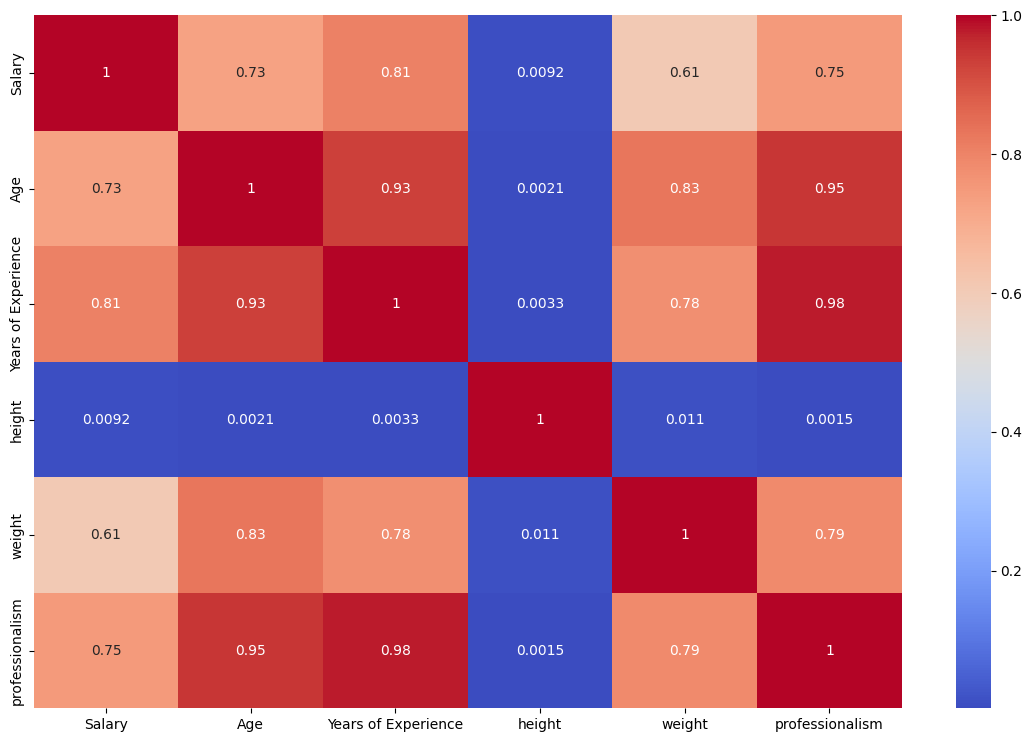

In [32]:
# Select numerical features of interest
selected_features = ['Salary', 'Age', 'Years of Experience', 'height', 'weight', 'professionalism']

# Create a correlation matrix
corr_matrix = combined_df[selected_features].corr()

# Plot the heatmap for visualization
plt.figure(figsize=(14, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


Interim conclusion:
1. The 'height' features seems uninformative given the low correlation with 'Salary'(0.0092)
2. 'Age', 'professionalism' and 'Years of Experience' are strongly correlated, possibly providing similar information (collinear variables?)
3. I'll drop 'Professionalism' and 'height'

Handling categorical features before performing features selection
1. We will model only gender = 'F' or Gender ='M', as there are very few 'O' and we want to reduce complexity
2. There are too many job titles which could be grouped together by essential information (e.g.: 'Manager', 'Engineer')
3. Education Level could also be recoded to express rank

In [33]:
# Consider dropping those rows
rows_with_O = X_train[X_train['Gender'] == 'O']
print(len(rows_with_O))

12


In [35]:
# Mapping
# I assume 'p' stands for something beyond masters given the mean salary and years of experience
education_mapping = {
    'high|scho': 'High School',
    'p': 'PhD/Professional',
    'bachelor': 'Bachelors',
    "bachelor's|degr": 'Bachelors',
    'master': 'Masters',
    "master's|degr": 'Masters'
}

# Create a new education level column with cleaned-up labels
combined_df['New Education Level'] = combined_df['Education Level'].map(education_mapping)

In [36]:
## Unique values in Education Level: high|scho, p, bachelor's|degr, bachelor, master, master's|degr
# The values for mean salary and mean years of experience indicae that 'p' is probably above 'Masters'
grouped1 = combined_df.groupby('New Education Level')['Salary'].mean()
grouped2 = combined_df.groupby('New Education Level')['Years of Experience'].mean()
print('Mean Salary')
print(grouped1)
print('**********'*4)
print('Mean Years of Experience')
print(grouped2)

Mean Salary
New Education Level
Bachelors            95478.581654
High School          37536.548961
Masters             129799.460570
PhD/Professional    165708.206865
Name: Salary, dtype: float64
****************************************
Mean Years of Experience
New Education Level
Bachelors            6.973468
High School          3.569733
Masters             11.134526
PhD/Professional    15.361781
Name: Years of Experience, dtype: float64


In [38]:
# Mean salary for each job title
mean_salary_by_title = combined_df.groupby('Job Title')['Salary'].mean().reset_index()
mean_salary_by_title = mean_salary_by_title.sort_values('Salary')
mean_salary_by_title.head(3)

,Job Title,Salary
102,receptionis,25000.000000
20,delivery|drive,28000.000000
75,junior|sales|associat,28296.296296


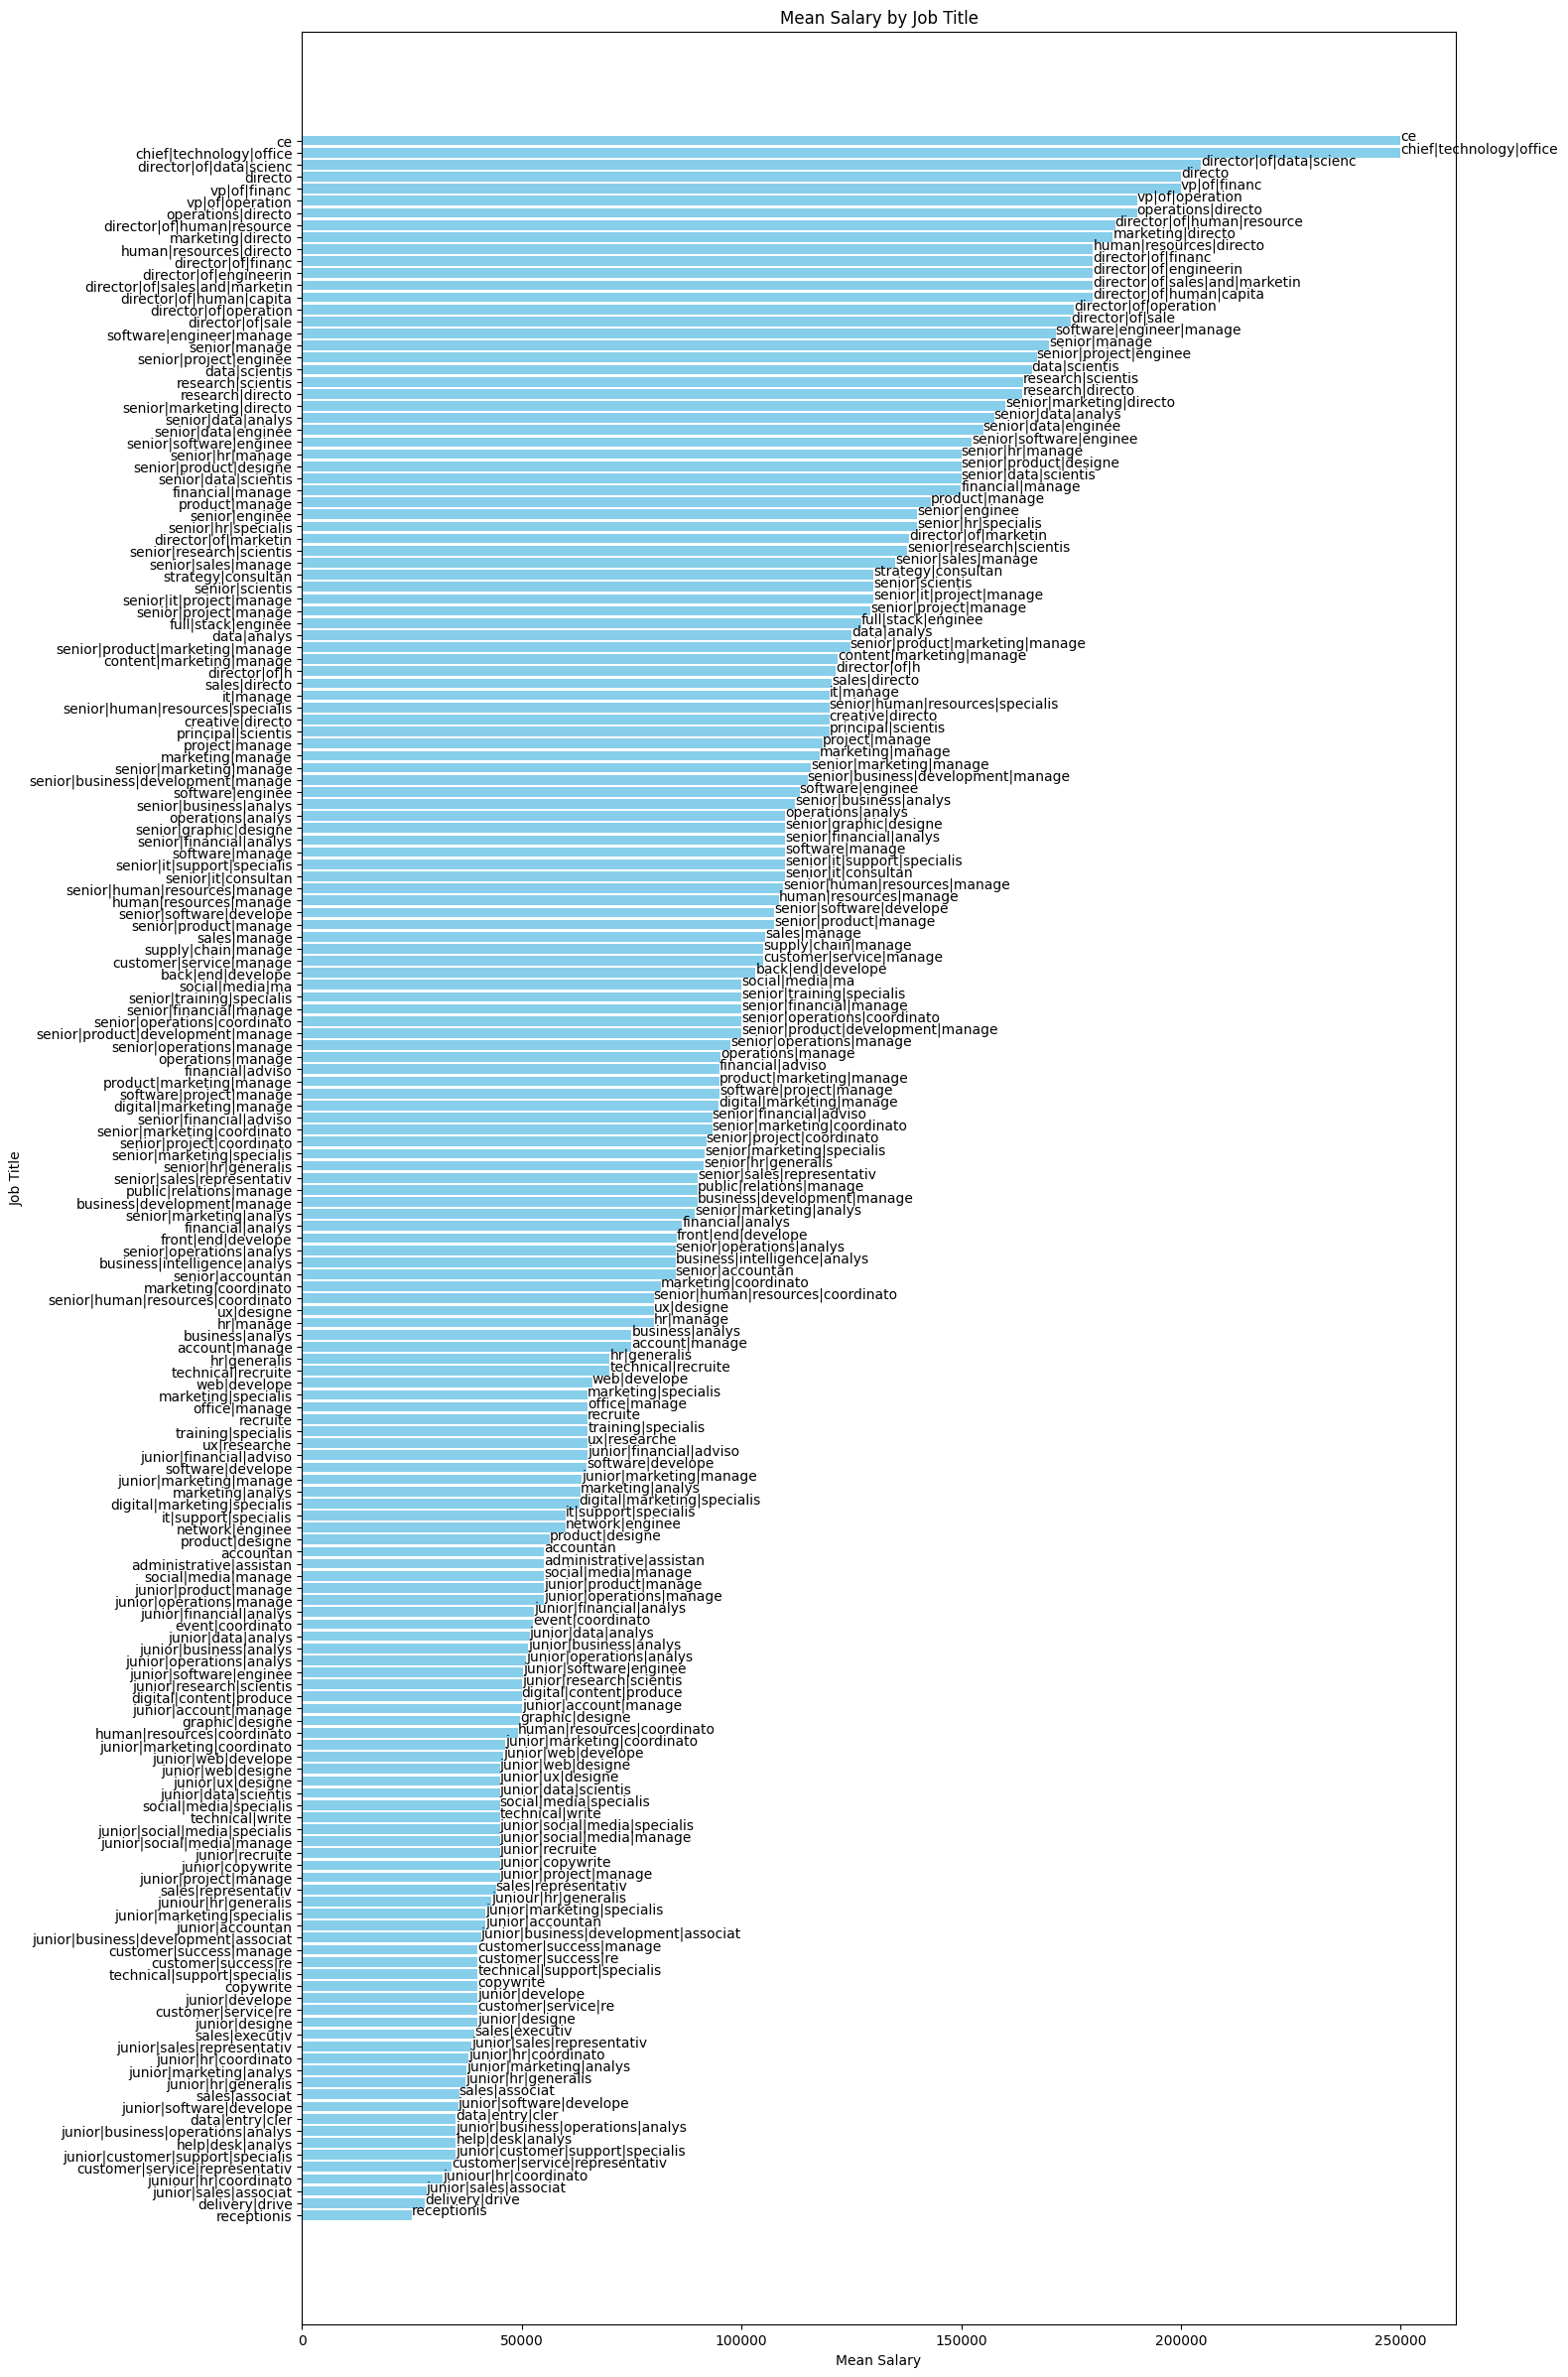

In [39]:
# Histogram of the mean salaries
plt.figure(figsize=(15, 30))  # set the figure size
plt.barh(mean_salary_by_title['Job Title'], mean_salary_by_title['Salary'], color='skyblue')

# Annotate each bar with the respective job title
for index, value in enumerate(mean_salary_by_title['Salary']):
    plt.text(value, index, str(mean_salary_by_title['Job Title'].iloc[index]))

plt.xlabel('Mean Salary')
plt.ylabel('Job Title')
plt.title('Mean Salary by Job Title')

plt.show()

# Looks like we can differentiate between director, senior, junior and other. The problem is that 'other' will include
# jobs with very high salary and vey low salary, so we might be losing data
# this is why  I think that we should use one-hot encoding and not label-encoding

In [40]:
def group_job_titles(title):
    if 'direct' in title.lower():
        return 'Director'
    elif 'senior' in title.lower():
        return 'Senior Position'
    elif 'junior' in title.lower():
        return 'Junior Position'
    else:
        return 'Other'

combined_df['Grouped Job Title'] = combined_df['Job Title'].apply(group_job_titles)


In [41]:
combined_df.head(4)

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race,height,weight,id,professionalism,Salary,New Education Level,Grouped Job Title
0,52.0,M,bachelor's|degr,back|end|develope,24.0,australi,Asian,1.800316,95.021957,2477,1150.0,175966.0,Bachelors,Other
1,52.0,F,bachelor,operations|manage,23.0,us,White,2.451414,87.456039,76,1100.0,160000.0,Bachelors,Other
2,27.0,M,bachelor,junior|accountan,2.0,australi,Australian,1.917509,56.997108,64,26.0,35000.0,Bachelors,Junior Position
3,32.0,M,bachelor,data|analys,11.0,u,Welsh,2.160562,61.403169,924,279.0,195000.0,Bachelors,Other


In [42]:
combined_df.groupby('Grouped Job Title')['Salary'].mean()

Grouped Job Title
Director           153764.204545
Junior Position     41320.776256
Other              114771.947661
Senior Position    144313.687980
Name: Salary, dtype: float64

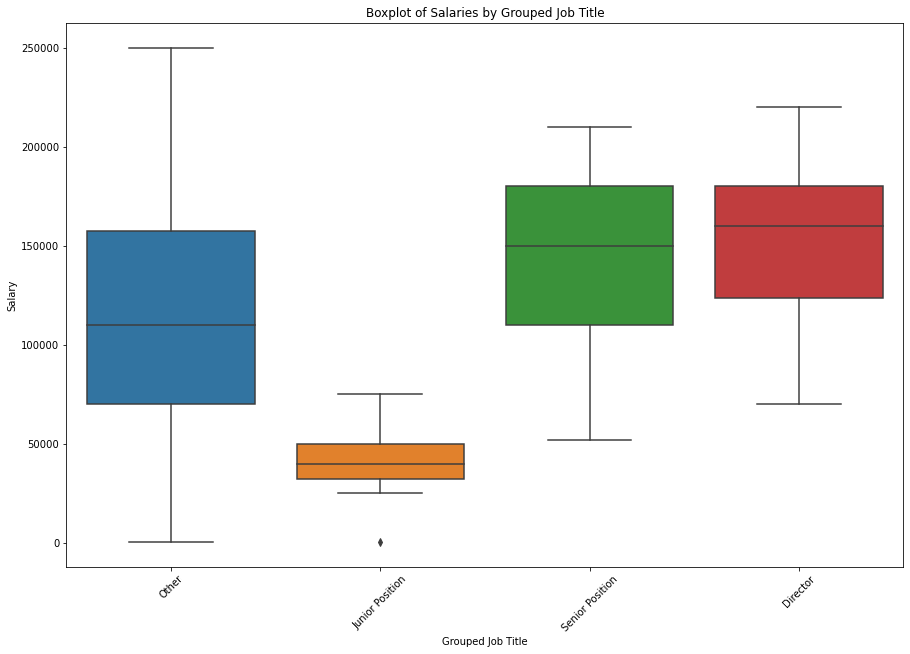

In [31]:
# Create a boxplot 
# As expected, the 'other' group is very variable and probably needs more grouping
plt.figure(figsize=(15, 10))
sns.boxplot(x='Grouped Job Title', y='Salary', data=combined_df)
plt.title("Boxplot of Salaries by Grouped Job Title")
plt.xticks(rotation=45)
plt.show()

NTS: It's clear that the the group 'other' is a bad grouping for it's wide whiskers, however this is the most robust grouping I can offer now

Categorical Feature Selection with a Regression Tree

In [80]:
# Select only the categorical columns
categorical_cols = ['Gender', 'Grouped Job Title', 'New Education Level','Country', 'Race'] 
X_categorical = combined_df[categorical_cols]

# Initialize one-hot encoder
encoder = OneHotEncoder()

# One-hot encode categorical columns
X_categorical_encoded = encoder.fit_transform(X_categorical).toarray()

# Extract feature names after one-hot encoding
feature_names = encoder.get_feature_names_out(input_features=categorical_cols)

# Now fit the model
model = DecisionTreeRegressor(max_leaf_nodes=30)
model.fit(X_categorical_encoded, combined_df['Salary']) 


DecisionTreeRegressor(max_leaf_nodes=30)

In [84]:
# Extract feature importances
importances = model.feature_importances_

# Create a DataFrame for feature importances
df_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance
df_importances = df_importances.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(df_importances)

                                 Feature  Importance
10  New Education Level_PhD/Professional    0.459316
4      Grouped Job Title_Junior Position    0.252206
9            New Education Level_Masters    0.142344
8        New Education Level_High School    0.074868
6      Grouped Job Title_Senior Position    0.020494
3             Grouped Job Title_Director    0.016124
0                               Gender_F    0.014031
7          New Education Level_Bachelors    0.004266
1                               Gender_M    0.002620
16                 Race_African American    0.002132
2                               Gender_O    0.002089
25                            Race_White    0.001602
20                          Race_Chinese    0.001549
19                            Race_Black    0.000961
13                          Country_chin    0.000891
12                         Country_canad    0.000840
22                           Race_Korean    0.000834
24                            Race_Welsh    0.

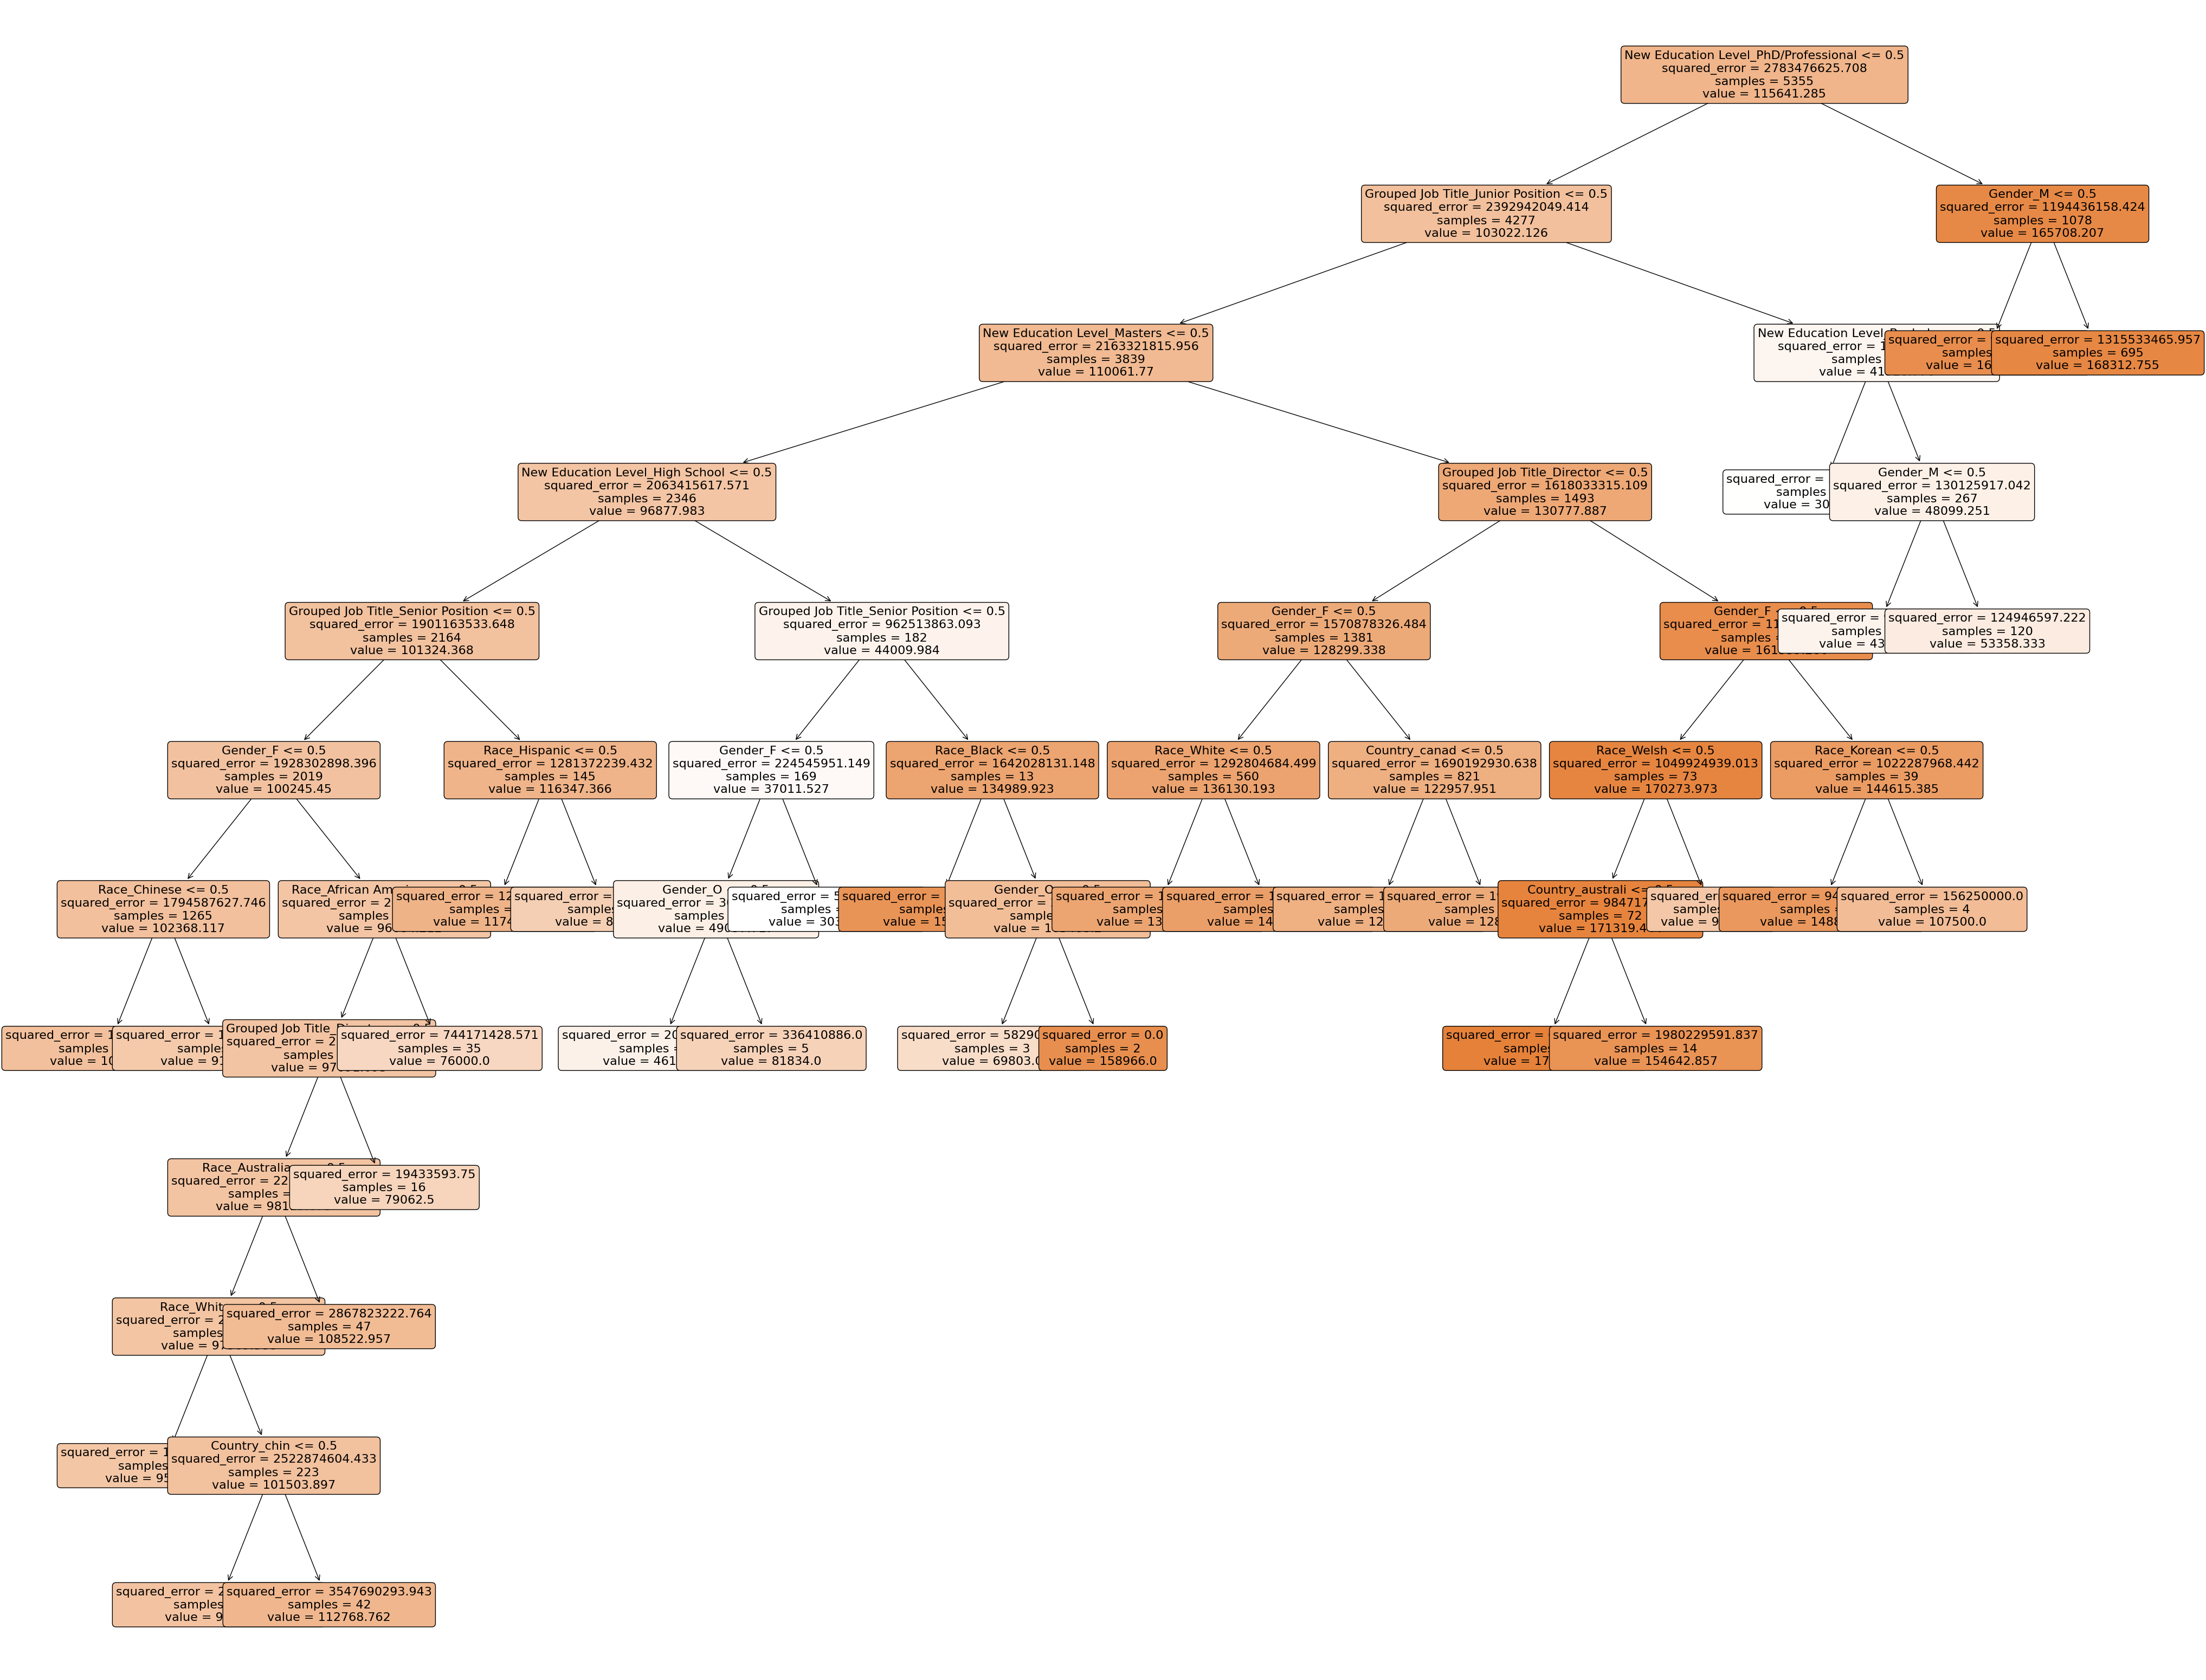

In [89]:
# dot_data = StringIO()  
# export_graphviz(model, out_file=dot_data, leaves_parallel=True)  
# graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]  
# Image(graph.create_png(), width=1000, height=2000) 

plt.figure(figsize=(50,40))  # Set the figure size
plot_tree(model, 
          feature_names=feature_names.tolist(),  # One-hot encoded feature names
          filled=True, 
          rounded=True, 
          fontsize=16)
plt.show()

I tried the tree model with all relevant features (numerical and categorical) to see the effect of all features together

In [77]:
# List of categorical columns
categorical_cols = ['Gender', 'Grouped Job Title', 'New Education Level', 'Country', 'Race']

# List of numerical columns (all other columns except the target variable 'Salary')
numerical_cols = ['Age', 'Years of Experience','weight'] # 'height' , 'id', and 'professionalism' dropped

# One-hot encode the categorical data
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_categorical_data = encoder.fit_transform(combined_df[categorical_cols])

# Create a DataFrame from the encoded data, with correct column names
encoded_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_cols))

# Combine with numerical data
final_df = pd.concat([encoded_df, combined_df[numerical_cols].reset_index(drop=True)], axis=1)

# Create Decision Tree model
model = DecisionTreeRegressor(max_leaf_nodes=30)

# Fit model
model.fit(final_df, combined_df['Salary'])

# If you want to see feature importance
feature_importances = model.feature_importances_
feature_names = final_df.columns
sorted_idx = feature_importances.argsort()

# Sort features by importance and create a DataFrame
sorted_features = [(feature_names[i], feature_importances[i]) for i in sorted_idx]
sorted_features_df = pd.DataFrame(sorted(sorted_features, key=lambda x: x[1], reverse=True), columns=['Feature', 'Importance'])

# Show the DataFrame
print(sorted_features_df)

                                 Feature  Importance
0                    Years of Experience    0.900131
1                                    Age    0.035411
2        New Education Level_High School    0.025859
3      Grouped Job Title_Junior Position    0.017265
4                Grouped Job Title_Other    0.006867
5   New Education Level_PhD/Professional    0.006443
6                               Gender_M    0.002943
7            New Education Level_Masters    0.002771
8                               Gender_F    0.002311
9                              Country_u    0.000000
10                            Race_White    0.000000
11                            Race_Welsh    0.000000
12                            Race_Mixed    0.000000
13                           Race_Korean    0.000000
14                         Race_Hispanic    0.000000
15                          Race_Chinese    0.000000
16                            Race_Black    0.000000
17                       Race_Australian    0.

C:\Users\12345\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Interim conclusions:
1. Seems like the most important categorical features are: 'New Education Level', 'Grouped Job Title' & 'Gender'.
2. Seems like 'Country' and 'Race' are less informative so I'll try dropping them
3. The importance of weight is unclear. It seem informative in the correlation matrix but not in the tree.
4. Implement Lasso with different sets of features and /or alpha parameter.  

Lasso regression

In [105]:
# Chosen features: 'Age', 'Years of Experience','weight', 'New Education Level', 'Grouped Job Title' & 'Gender'.
print(combined_df['Grouped Job Title'].unique())
print(encoded_categorical_df.columns)


['Other' 'Junior Position' 'Senior Position' 'Director']
Index(['New Education Level_Bachelors', 'New Education Level_High School',
       'New Education Level_Masters', 'New Education Level_PhD/Professional',
       'Grouped Job Title_Director', 'Grouped Job Title_Junior Position',
       'Grouped Job Title_Other', 'Grouped Job Title_Senior Position',
       'Gender_F', 'Gender_M', 'Gender_O'],
      dtype='object')


In [116]:
# Separate numerical and categorical columns
numerical_cols = ['Age', 'Years of Experience','weight']
categorical_cols = ['New Education Level', 'Grouped Job Title', 'Gender']


# Normalize numerical columns
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(combined_df[numerical_cols])
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_cols)

# One-hot encode categorical columns
encoder = OneHotEncoder(drop=None, sparse_output=False) # sparse param takes care of how the array with zeros is stored
encoded_categorical = encoder.fit_transform(combined_df[categorical_cols])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols))


# Concatenate the numerical and categorical dataframes
final_df = pd.concat([scaled_numerical_df, encoded_categorical_df], axis=1)

final_df.columns
# final_df.shape (5355, 14)
# combined_df.Salary.shape (5355,)
# print(encoded_categorical_df.head(5))

Index(['Age', 'Years of Experience', 'weight', 'New Education Level_Bachelors',
       'New Education Level_High School', 'New Education Level_Masters',
       'New Education Level_PhD/Professional', 'Grouped Job Title_Director',
       'Grouped Job Title_Junior Position', 'Grouped Job Title_Other',
       'Grouped Job Title_Senior Position', 'Gender_F', 'Gender_M',
       'Gender_O'],
      dtype='object')

In [127]:
# Initialize the lasso regressor
lasso = Lasso(alpha=0.01)

# Define the training data and the y data:
X_train_lasso = final_df
y_train_lasso = combined_df['Salary']

# Fit the regressor to the data
lasso.fit(X_train_lasso, y_train_lasso)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print("Lasso Coefficients:", lasso_coef)

# Compute predicted y based on X_train_lasso
y_predicted = lasso.predict(X_train_lasso)

Lasso Coefficients: [ -8222.33733875  42526.79436792   -396.86698649 -13121.57166308
 -40867.72440278  -2793.85620162   9808.41036767   2515.04131124
 -21260.31173576   5092.35563984  -3339.13431399  -4954.11501126
    139.23175932 -14772.50389002]


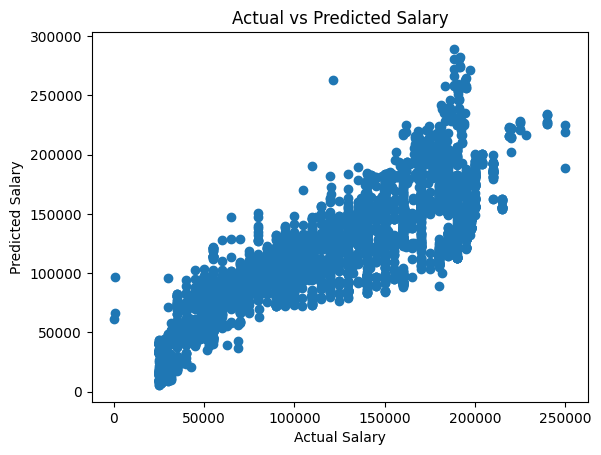

In [128]:
plt.scatter(y_train_lasso, y_predicted)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.show()

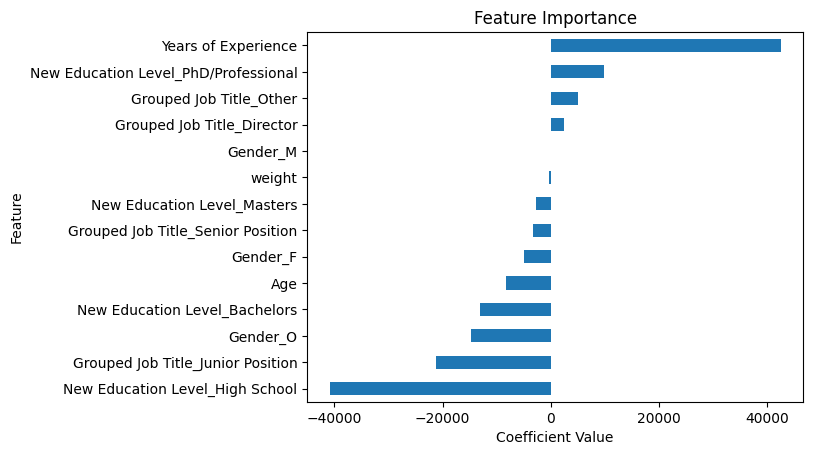

In [129]:
# Assuming lasso_coef contains your coefficients and final_df.columns are your feature names
feature_importance = pd.Series(lasso_coef, index=final_df.columns)
feature_importance = feature_importance.sort_values()

feature_importance.plot(kind='barh')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


In [ ]:


'''
Resources:
Naya notebooks
Chat GPT
https://www.youtube.com/watch?v=1fFVt4tQjRE

'''



In [56]:
# import sklearn
# print(sklearn.__version__)


In [57]:
# pip install --upgrade scikit-learn
